In [27]:
import pandas as pd 
df = pd.read_csv('allreviews.csv')
df.sample(5)

,Rating,Review Title,Review Content
828,"5,0 von 5 Sternen",Superb JBL,Superb sound as JBL always does for me. I have...
1915,"5,0 von 5 Sternen",Ein Knaller!,Ich habe selten ein so durchdachtes Feature ge...
1286,"4,0 von 5 Sternen",No spares but good phones,Superb sound as JBL always does for me. I have...
928,"5,0 von 5 Sternen",Einfach klasse,Nachdem ich verschiedene Modelle getestet habe...
1763,"4,0 von 5 Sternen","be aware, they are the new airpods but come in...",This is not an issue if you don't wish to pay ...


In [11]:
import nltk
from nltk.corpus import stopwords
from nltk import PorterStemmer

In [26]:
stops=stopwords.words(['german','english'])

In [33]:
import string
import re

def clean_text(text):
    ps=PorterStemmer()
    
    text_cleaned="".join([x for x in text if x not in string.punctuation]) # remove punctuation
    
    text_cleaned=re.sub(' +', ' ', text_cleaned) # remove extra white spaces
    text_cleaned=text_cleaned.lower() # converting to lowercase
    tokens=text_cleaned.split(" ")
    tokens=[token for token in tokens if token not in stops] # Taking only those words which are not stopwords
    text_cleaned=" ".join([ps.stem(token) for token in tokens])
    
    return text_cleaned
df['Cleaned Reviews']=df['Review Content'].apply(lambda x:clean_text(x))
df.sample(5)

,Rating,Review Title,Review Content,Cleaned Reviews
1646,"4,0 von 5 Sternen","be aware, they are the new airpods but come in...",This is not an issue if you don't wish to pay ...,issu dont wish pay extra £40 wireless charg ca...
720,"5,0 von 5 Sternen",Einfach klasse,Nachdem ich verschiedene Modelle getestet habe...,nachdem verschieden model getestet jbl reflect...
392,"5,0 von 5 Sternen",Klare Kaufempfehlung für 40 EUR. Lohnt sich au...,"Das sind jetzt meine ersten Wireless Earbuds, ...",ersten wireless earbud nachdem schon zweiten m...
1426,"1,0 von 5 Sternen","Parcel came, no AirPods",This is not an issue if you don't wish to pay ...,issu dont wish pay extra £40 wireless charg ca...
310,"4,0 von 5 Sternen",So far so good,Got these for Xmas. I have been using them sin...,got xma use sinc mainli listen audio book movi...


In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

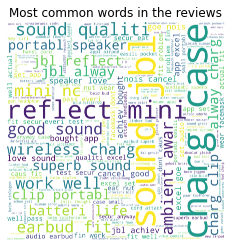

<Figure size 432x288 with 0 Axes>

In [43]:
from wordcloud import WordCloud
wordcloud = WordCloud(height=2000, width=2000, background_color='white')
wordcloud = wordcloud.generate(' '.join(df['Cleaned Reviews'].tolist()))
plt.imshow(wordcloud)
plt.title("Most common words in the reviews")
plt.axis('off')
plt.show()
plt.tight_layout()
plt.savefig("wcloud.png")